<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Proyectos

Proyectos propuestos para Python Analytics<br>
v1.5

### Formato de entrega
Toda la etapa de entrenamiento del proyecto se debe realizar en un colab o nootebook que luego el alumno subierá a su repositorio de proyecto para que el profesor pueda evaluar los avances.<br>

__APROBACIÓN:__ El proyecto será aprobado cuando el modelo entrenado alcance la exactitud/condición planteada en el proyecto.<br>

### Predicción de enfermedades cardíacas
<img src="https://github.com/InoveAlumnos/proyecto_analytics_python/raw/main/heart.png" width="300" align="center">

- El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
- Deberá entrenar un modelo clasificador y varios algoritmos para clasificación. Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
- Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
- A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#### Objetivo

El accuracy del modelo definitivo debe superar el 80% (0.8)

#### Como descargar el dataset

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

***RECOLECCIÓN DE DATOS***

In [2]:
# Ejecutar:

if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

--2024-05-07 00:33:15--  http://heart.csv/
Resolving heart.csv (heart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘heart.csv’
--2024-05-07 00:33:15--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2024-05-07 00:33:15 (57.6 MB/s) - ‘heart.csv’ saved [11323/11323]

FINISHED --2024-05-07 00:33:15--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (57.6 MB/s)


***PROCESAMIENTO DE LOS DATOS***

In [3]:
# Analisis descriptivo y busqueda de datos faltantes:

df = pd.read_csv("heart.csv")
des = df.describe()
des.loc["Nan"] = df.isna().sum()
des.loc["%Nan"] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**El análisis estadístico y descriptivo del dataframe arroja no tener elementos faltantes**

In [4]:
print("El Dataframe contiene", df.shape[0], "filas y", df.shape[1], "columnas en observación")

El Dataframe contiene 303 filas y 14 columnas en observación


***EXPLORACIÓN DE LOS DATOS***

In [5]:
# Inspección y visualización de columnas y primeras filas:

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Balanceo del dataset
# 1 - Respecto de la existencia o no de "Patologia cardíaca":

df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
porcentual = (df["target"].sum() / len(df)) * 100
print("Porcentaje de pacientes con Patologías cardíacas:", round(porcentual, 2),"%")

Porcentaje de pacientes con Patologías cardíacas: 54.46 %


Text(0.5, 1.0, 'Distribución de Pacientes con Patología Cardíaca')

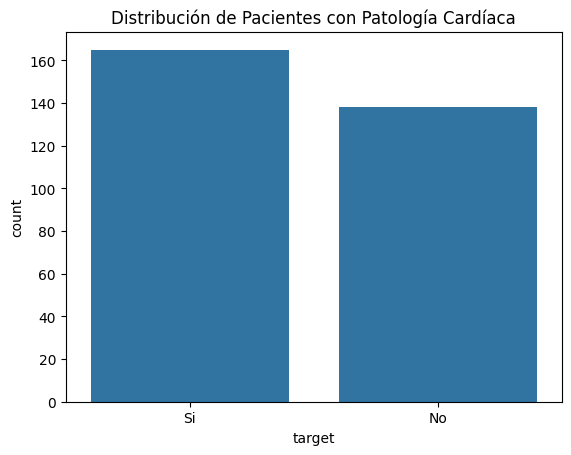

In [8]:
# Gráfico:

ax = sns.countplot(data=df , x=df["target"].replace({0:"No", 1:"Si"}))
ax.set_title("Distribución de Pacientes con Patología Cardíaca", fontsize=12)

**Dado que el porcentaje de pacientes con "Patología cardíaca" es cercano al 50%, se puede inferir que el dataset esta balanceado en este aspecto.**

In [9]:
# 2 - Respecto de la cantidad de pacientes mujeres y varones:

df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
porcentual_mujeres = (df["sex"].value_counts()[0] / len(df)) * 100
porcentual_varones = (df["sex"].value_counts()[1] / len(df)) * 100
print("Porcentaje de pacientes mujeres:", round(porcentual_mujeres, 2),"%")
print("Porcentaje de pacientes varones:", round(porcentual_varones, 2),"%")

Porcentaje de pacientes mujeres: 31.68 %
Porcentaje de pacientes varones: 68.32 %


Text(0.5, 1.0, 'Distribución de Pacientes por género')

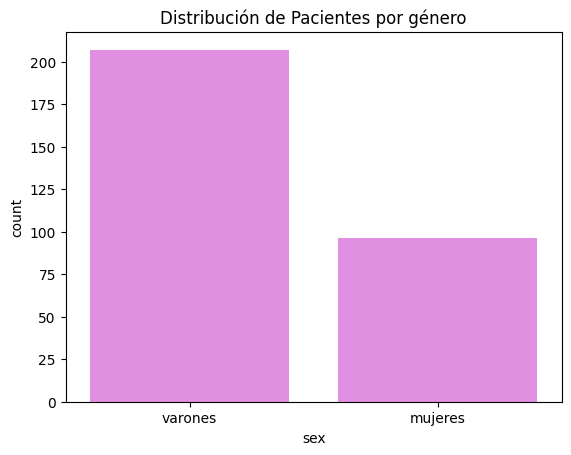

In [11]:
# Gráfico:

ax = sns.countplot(data=df, x=df["sex"].replace({0:"mujeres", 1:"varones"}), color="violet")
ax.set_title("Distribución de Pacientes por género", fontsize=12)

**El gráfico permite observar, a simple vista, que el dataset no está balanceado respecto de la cantidad de pacientes según el género.**

In [12]:
# 3 - Respecto de la distribución de la edad de los pacientes:

df["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

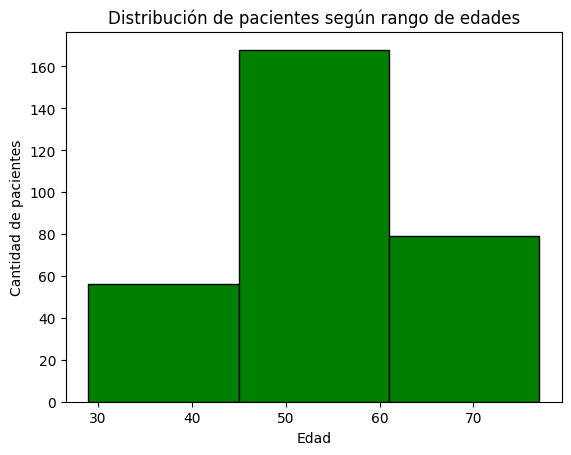

In [13]:
plt.hist(df["age"], bins=3, color="Green", edgecolor="Black")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de pacientes según rango de edades", fontsize=12)
plt.show()

**Utilizando un gráfico de histograma, se puede agrupar en rangos de edad, lo que nos permite comprender que no hay balance dado que se observan un pico en el rango intermedio (>45 y <65 años) y menor cantidad de pacientes en los rangos extremos.**

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Creo una lista con las columnas categoricas y aplico OneHotEncoder:

categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Obtengo los nombres de las columnas codificadas:

encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Creo un nuevo DataFrame con las columnas codificadas:

df_encoded = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concateo el DataFrame codificado con el DataFrame original y borro columnas originales:

df_cod = pd.concat([df, df_encoded], axis=1)
df_cod.drop(categorical_columns, axis=1, inplace=True)

df_cod.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,187,3.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,172,1.4,1,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,120,354,163,0.6,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Normalización de los datos:
from sklearn.preprocessing import MinMaxScaler
df1 = df_cod.copy()
columnas = ["age", "chol", "trestbps", "thalach", "oldpeak"]
scaler = MinMaxScaler()
df1[columnas] = scaler.fit_transform(df1[columnas])
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**ENTRENAMIENTO Y VALIDACIÓN DEL MODELO**

In [16]:
# Datos de entrada y salida:
df2 = df1.copy()
X = df2.drop("target", axis=1).values
y = df2["target"].values

In [17]:
# Generar los dataset de entrenamiento y evaluación (criterio 70% - 30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Modelo de entrenamiento N°1**

In [18]:
# Clasificador RandomForest:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, max_depth=5, criterion="entropy", random_state=0)
clf.fit(X_train, y_train)
y_hat_1 = clf.predict(X_test)
y_hat_1

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [19]:
# Validación:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat_1, normalize=True)
print("Accuracy del entrenamiento N°1:", round(((accuracy)*100),2),"%")

Accuracy del entrenamiento N°1: 80.22 %


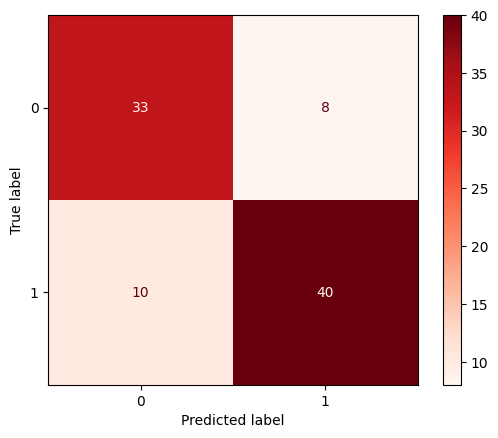

In [20]:
# Matriz de confusión:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat_1)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Reds)
plt.show()

**En este entrenamiento utilizando el clasificador RandomForest con 4 arboles de decisión y una profundidad de 5 en cada uno, la precisión del modelo es del 80,22%.**

**Modelo de entrenamiento N°2**

In [43]:
# Clasificador RandomForest:

clf = RandomForestClassifier(n_estimators=12, max_depth=3, criterion="entropy", random_state=0)
clf.fit(X_train, y_train)
y_hat_2 = clf.predict(X_test)
y_hat_2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1])

In [44]:
# Validación:

accuracy = accuracy_score(y_test, y_hat_2, normalize=True)
print("Accuracy del entrenamiento N°2:", round(((accuracy)*100),2),"%")

Accuracy del entrenamiento N°2: 85.71 %


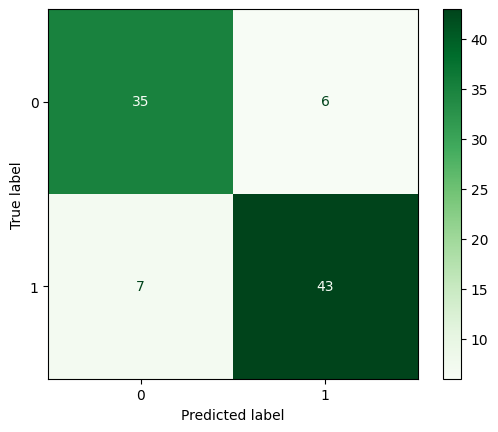

In [45]:
# Matriz de confusión:

cm = confusion_matrix(y_test, y_hat_2)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Greens)
plt.show()

**Luego de realizar varias pruebas con diferentes n_estimators y max_depth, pude mejorar la presición del modelo (con 9 árboles y 4 de profundidad) logrando un accuracy_score de 85,71%, reduciendo significativamente los falsos positivos y falsos negativos.**

**Modelo de entrenamiento N°3**

In [49]:
# Regresión Logística:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_hat_3 = clf.predict(X_test)
y_hat_3


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [50]:
# Validación:

accuracy = accuracy_score(y_test, y_hat_3, normalize=True)
print("Accuracy del entrenamiento N°3:", round(((accuracy)*100),2),"%")

Accuracy del entrenamiento N°3: 83.52 %


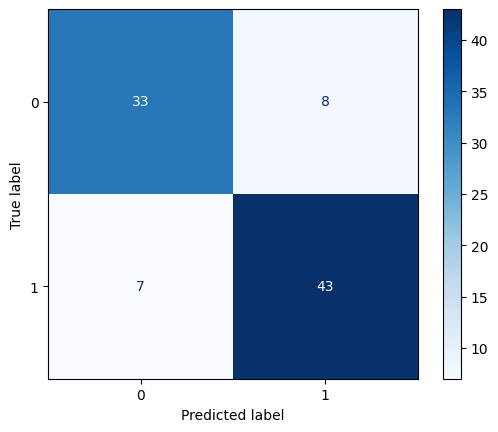

In [51]:
# Matriz de confusión:

cm = confusion_matrix(y_test, y_hat_3)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

**El entrenamiento realizado utilizando la Regresión Logísitca arroja un accuracy de 83,52%, con menor precisión que el entrenamiento N°2.**

**Modelo de entrenamiento N°4**

In [85]:
# Clasificador por vecinos cercanos KNN:

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
y_hat_4 = clf.predict(X_test)
y_hat_4

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1])

In [86]:
# Validación:

accuracy = accuracy_score(y_test, y_hat_4, normalize=True)
print("Accuracy del entrenamiento N°4:", round(((accuracy)*100),2),"%")

Accuracy del entrenamiento N°4: 84.62 %


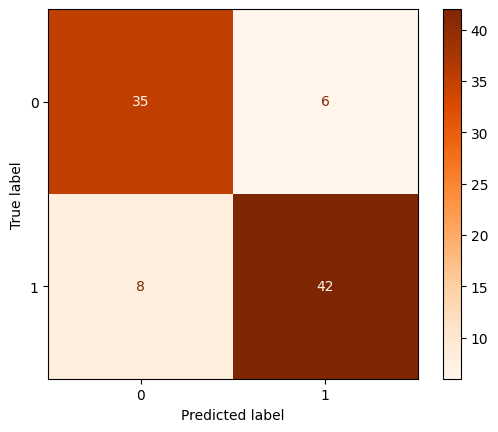

In [87]:
# Matriz de confusión:

cm = confusion_matrix(y_test, y_hat_4)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Oranges)
plt.show()

**El entrenamiento realizado con el clasificador KNN, luego de varias pruebas con diferentes valores, logró una precisión del 84,62% con un n_neighbors= 8.**

**A MODO DE CONCLUSIÓN, LA UTILIZACIÓN DEL CLASIFICADOR RANDOM FOREST, RESULTÓ SER EL MAS ADECUADO PARA ENTRENAR EL MODELO Y PREDECIR CON MAYOR EXACTITUD, SI UN PACIENTE ES PROPENSO O NO A PADECER PATOLOGÍAS CARDÍACAS.**